In [ ]:
#let's define Room coordinates
#PARENT 1
R1a=[1,1,2,1,2,2,1,2]
R2a=[1,3,2,3,2,5,1,5]
R3a=[3,2,6,2,6,4,3,4]
R4a=[4,0,8,0,8,1,4,1]
R5a=[7,2,8,2,8,5,7,5]
immobile=[0,0,8,0,8,5,0,5]

firstgenparenta=[R1a,R2a,R3a,R4a,R5a]

In [ ]:
#PARENT 2:
R1b=[1,0,2,0,2,2,1,2]
R2b=[1,3,5,3,5,4,1,4]
R3b=[4,1,5,1,5,2,4,2]
R4b=[6,1,7,1,7,2,6,2]
R5b=[6,3,7,3,6,4,7,4]

firstgenparentb=[R1b,R2b,R3b,R4b,R5b]

In [ ]:
#CROSSOVER FUNCTION
import random
def crossover(parent1,parent2):

  crossover_pt=random.randint(1,len(parent1)-1)
  print("crossover pt is ",crossover_pt)
  offspring1=parent1[:crossover_pt]+parent2[crossover_pt:]
  offspring2=parent2[:crossover_pt]+parent1[crossover_pt:]
  return offspring1,offspring2

offspring1,offspring2= crossover(firstgenparenta,firstgenparentb)

print("offspring1:",offspring1)
print("offspring2:",offspring2)

crossover pt is  4
offspring1: [[1, 1, 2, 1, 2, 2, 1, 2], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]
offspring2: [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]]


In [ ]:
import random
def mutate(rectangles_coords):
    # Select a random rectangle index and a random coordinate index
    rectangle_index = random.randint(0, len(rectangles_coords) - 1)
    coordinate_index = random.randint(0, len(rectangles_coords[rectangle_index]) - 1)

    # Generate a random mutation for the selected coordinate
    mutation = random.randint(0, 3)  # You can adjust the range of mutation as needed

    # Mutate the selected coordinate
    rectangles_coords[rectangle_index][coordinate_index] += mutation

In [ ]:
# Create a list to store mutated coordinates
def mutationfunction(off1,off2):
  mutated1=[]
  mutated2=[]

#Perform mutations and store mutated coordinates
  # Deep copy the original coordinates to avoid modifying them directly
  off1_copy = [list(rect) for rect in off1]
  mutate(off1_copy)
  mutated1.append(off1_copy)

  off2_copy = [list(rect) for rect in off2]
  mutate(off2_copy)
  mutate(off2_copy)
  mutated2.append(off2_copy)

  return mutated1,mutated2
mut1,mut2=mutationfunction(offspring1,offspring2)
muts=[mut1,mut2]
print("offspring1:",offspring1)

print()
print("mutated offspring1:",mut1)
print()
print("offspring2:",offspring2)
print("mutated offspring2:",mut2)

offspring1: [[1, 1, 2, 1, 2, 2, 1, 2], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]

mutated offspring1: [[[1, 1, 2, 1, 2, 2, 1, 3], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]]

offspring2: [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]]
mutated offspring2: [[[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]]]


In [ ]:
mutatedlist=mut2 + mut1
print(mutatedlist)

[[[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]], [[1, 1, 2, 1, 2, 2, 1, 3], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]]


In [ ]:
#CALCULATING areas of the rooms from coordinates
import math

def distance(x1, y1, x2, y2):
    return math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))

def rectangle_area(coords):
    if len(coords) != 8:
        raise ValueError("Coordinates array must contain exactly 4 points (8 values)")

    # Extract coordinates from the array
    x1, y1, x2, y2, x3, y3, x4, y4 = coords

    # Calculate the lengths of two adjacent sides (assuming it's a rectangle)

    side1 = distance(x1, y1, x2, y2)
    side2 = distance(x2, y2, x3, y3)

    # Calculate the area by multiplying the lengths of the sides
    area = side1 * side2
    return area

area1=rectangle_area(R1)
area2=rectangle_area(R2)
area3=rectangle_area(R3)
area4=rectangle_area(R4)
area5=rectangle_area(R5)

# Calculate and print the area of the rectangle
print("Area of the room 1:", rectangle_area(R1))
print("Area of the room 2:", rectangle_area(R2))
print("Area of the room 3:", rectangle_area(R3))
print("Area of the room 4:", rectangle_area(R4))
print("Area of the room 5:", rectangle_area(R5))

#total area is
totalarea=rectangle_area(immobile)
print("Area of the overall available space:",totalarea)


Area of the room 1: 2.0
Area of the room 2: 4.0
Area of the room 3: 1.0
Area of the room 4: 1.0
Area of the room 5: 1.4142135623730951
Area of the overall available space: 40.0


In [ ]:
def rectangles_overlap(rect_coords_list):
    num_rectangles = len(rect_coords_list)

    # Iterate through each pair of rectangles
    for i in range(num_rectangles):
        for j in range(i + 1, num_rectangles):
            rect1_coords = rect_coords_list[i]
            rect2_coords = rect_coords_list[j]

            # Unpack coordinates of rectangles
            x1, y1, x2, y2, x3, y3, x4, y4 = rect1_coords
            x5, y5, x6, y6, x7, y7, x8, y8 = rect2_coords

            # Check if any corner of one rectangle lies within the other rectangle
            if (x1 < x8 and x2 > x5 and y1 < y8 and y2 > y5) or \
               (x5 < x2 and x6 > x1 and y5 < y2 and y6 > y1):
                return True  # If overlap is found, return True

    return False  # If no overlap is found among any pair, return False

allrects=[
    R1,R2,R3,R4,R5
]
# Check if any of the rectangles overlap
#print(allrects)
if rectangles_overlap(allrects):
    print("There is overlap among the rectangles.")
else:
    print("There is no overlap among the rectangles.")



There is no overlap among the rectangles.


In [ ]:
allrects = [[int(coord) for coord in rectangle] for rectangle in allrects]

# Print the updated rectangles_coords
print(allrects)

[[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [6, 3, 7, 3, 6, 4, 7, 4]]


In [ ]:
import math
def distance1(x1, y1, x2, y2):
    return math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))

def distance_between_rectangles(rect1_coords, rect2_coords):
    min_distance = 100000000

    # Iterate through each pair of corresponding coordinates of the rectangles
    for i in range(0, len(rect1_coords), 2):
        for j in range(0, len(rect2_coords), 2):
            # Calculate the distance between the corresponding coordinates
            a=rect1_coords[i]
            b=rect1_coords[i+1]
            c=rect2_coords[j]
            d=rect2_coords[j+1]

            dist = distance1(a,b,c,d)

            # Update the minimum distance if necessary
            min_distance = min(min_distance, dist)

    return min_distance

# Calculate the distance between each pair of rectangles
for i in range(len(allrects)):
    for j in range(i + 1, len(allrects)):
        distance = distance_between_rectangles(allrects[i], allrects[j])
        print(f"Distance between rectangles {i+1} and {j+1}: {distance}")


Distance between rectangles 1 and 2: 1.0
Distance between rectangles 1 and 3: 2.0
Distance between rectangles 1 and 4: 4.0
Distance between rectangles 1 and 5: 4.123105625617661
Distance between rectangles 2 and 3: 1.0
Distance between rectangles 2 and 4: 1.4142135623730951
Distance between rectangles 2 and 5: 1.0
Distance between rectangles 3 and 4: 1.0
Distance between rectangles 3 and 5: 1.4142135623730951
Distance between rectangles 4 and 5: 1.0


In [ ]:
def is_valid_rectangle(coords):
    # Check if the number of coordinates is divisible by 2 and has exactly 8 elements for one rectangle
    if len(coords) != 8:
        return False

    # Check if the sides are parallel to the coordinate axes
    for i in range(0, len(coords), 2):
        if coords[i] != coords[(i + 2) % len(coords)] and coords[i + 1] != coords[(i + 3) % len(coords)]:
            return False

    # Check if opposite sides have equal length
    side_lengths = []
    for i in range(0, len(coords), 2):
      if(i==6):
        side_length=(coords[0]-coords[i])**2 + (coords[1]-coords[i+1])**2
      else:
        side_length = (coords[i + 2] - coords[i]) ** 2 + (coords[i + 3] - coords[i + 1]) ** 2

      side_lengths.append(side_length)
    #print(side_lengths)
    if side_lengths[0] != side_lengths[2] or side_lengths[1] != side_lengths[3]:
        return False

    return True

# Example coordinates of one rectangle
rectangle_coords = [1, 1, 2, 1, 2, 2, 1, 2]  # Rectangle with vertices (0, 0), (3, 0), (3, 3), (0, 3)

# Check if the coordinates form a valid rectangle
if is_valid_rectangle(rectangle_coords):
    print("The coordinates form a valid rectangle.")
else:
    print("The coordinates do not form a valid rectangle.")




The coordinates form a valid rectangle.


In [ ]:
import matplotlib.pyplot as plt

def plotting(rects):
# Plot each rectangle
  for rectangle_coords in rects:
    # Extract x and y coordinates
      x = rectangle_coords[::2]
      y = rectangle_coords[1::2]

    # Plot the rectangle
      plt.plot(x + [x[0]], y + [y[0]], 'b-')  # 'b-' for blue lines

# Set plot title and labels
  plt.title('Rooms Plot')
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

# Show plot
  plt.grid(True)
  plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
  plt.show()


In [ ]:
#FITNESS EVALUATION
def fitnesseval(rects):
  rovers=[]
  fs=[]
  ranks={}
  for i in rects:

    sumd=0
    score=0
    #print(i)

    isoverlap=rectangles_overlap(i)

    #print("Are rectangles overlapping:",isoverlap)

    if(isoverlap==True):
      overlapfactor=-3
    else:
      overlapfactor=6

    for j in i:
      checks=is_valid_rectangle(j)
      rovers.append(checks)

    if (all(rovers)==True):
      #print("All rooms are valid shapes")
      validfactor=1
    else:
      #print("All rooms are not valid shapes")
      validfactor=-6
  #print("Are rectangles valid in current rectangle:",rovers)

  #evaluating the distance between them
    for a in range(len(i)):

      for b in range(a + 1, len(i)):
        #print(i[a],i[b])
          distance = distance_between_rectangles(i[a], i[b])
        #print(f"Distance between rectangles {a+1} and {b+1}: {distance}")
          sumd=sumd+distance
    avg=sumd/5
    if(avg<=1 and avg>=0):
      distancefactor=3
    elif(avg>1 and avg<5):
      distancefactor=2
    elif(avg>=5 and avg<10):
      distancefactor=1
    else:
      distancefactor=0

    #print(avg)

    #plotting(i)
    score=overlapfactor+distancefactor+validfactor
    #print("score of ",i)
    #print(score)
    ranks[score]=i
    fs.append(score)
  fs.sort()
  return fs,ranks

In [ ]:
fs=[]
ranks={}
fs,ranks=fitnesseval(mutatedlist)
print(fs)
print(ranks)
#plotting(mutatedlist)

[2, 9]
{9: [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]], 2: [[1, 1, 2, 1, 2, 2, 1, 3], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]}


In [ ]:

firstgenparenta=[firstgenparenta]
firstgenparentb=[firstgenparentb]
parents=firstgenparenta+firstgenparentb
print(parents)

[[[1, 1, 2, 1, 2, 2, 1, 2], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [7, 2, 8, 2, 8, 5, 7, 5]], [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [6, 3, 7, 3, 6, 4, 7, 4]]]


In [ ]:
#ROULETTE WHEEL SELECTION
entirepop=[]
entirepop += fs
print("Fitness: Current pop:",ranks)
#print("Fitnesses of current populations:",fs)
#MU+lambda
#print("Fitness of top 2:",fs[-1],fs[-2])

p1,pdict=fitnesseval(parents)
print("Fitness of original parents:",p1)

print(pdict)
entirepop=entirepop+p1
print("MU+LAMBDA:",entirepop)
entirepop.sort
entirepop=entirepop[-2:]

print("New population:",entirepop)

Fitness: Current pop: {9: [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [7, 2, 8, 2, 8, 5, 7, 5]], 2: [[1, 1, 2, 1, 2, 2, 1, 3], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [6, 3, 7, 3, 6, 4, 7, 4]]}
Fitness of original parents: [2, 9]
{9: [[1, 1, 2, 1, 2, 2, 1, 2], [1, 3, 2, 3, 2, 5, 1, 5], [3, 2, 6, 2, 6, 4, 3, 4], [4, 0, 8, 0, 8, 1, 4, 1], [7, 2, 8, 2, 8, 5, 7, 5]], 2: [[1, 0, 2, 0, 2, 2, 1, 2], [1, 3, 5, 3, 5, 4, 1, 4], [4, 1, 5, 1, 5, 2, 4, 2], [6, 1, 7, 1, 7, 2, 6, 2], [6, 3, 7, 3, 6, 4, 7, 4]]}
MU+LAMBDA: [2, 9, 2, 9]
New population: [2, 9]


[2, 9]


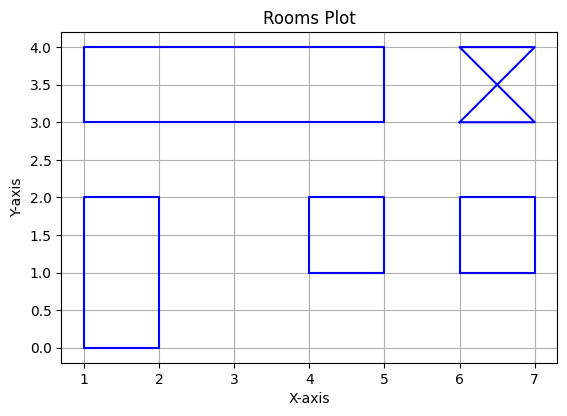

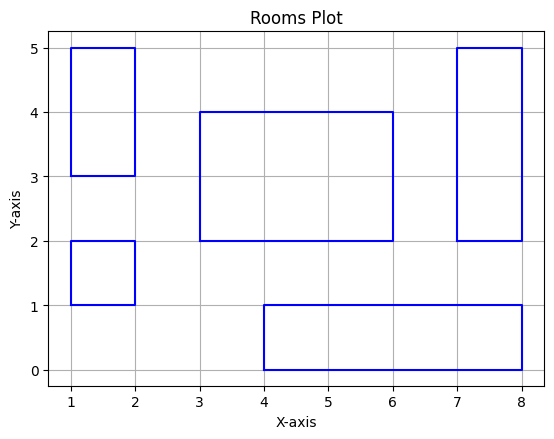

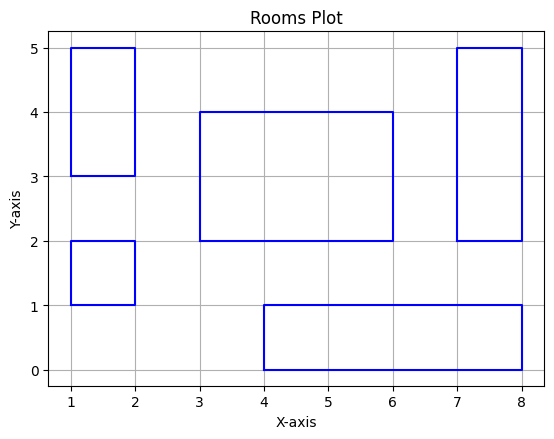

In [ ]:
ranks.update(pdict)
print(entirepop)

for i in entirepop:
  plotting(ranks[i])

plotting(ranks[9])